In [1]:
!pip install tensorflow

Training data shape: (60000, 28, 28, 1), Training labels shape: (60000,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8532 - loss: 0.5279 - val_accuracy: 0.9630 - val_loss: 0.1257
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9705 - loss: 0.1037 - val_accuracy: 0.9768 - val_loss: 0.0778
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9813 - loss: 0.0616 - val_accuracy: 0.9820 - val_loss: 0.0637
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0430 - val_accuracy: 0.9827 - val_loss: 0.0563
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9893 - loss: 0.0359 - val_accuracy: 0.9824 - val_loss: 0.0616
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0769

Test Accuracy: 0.9807


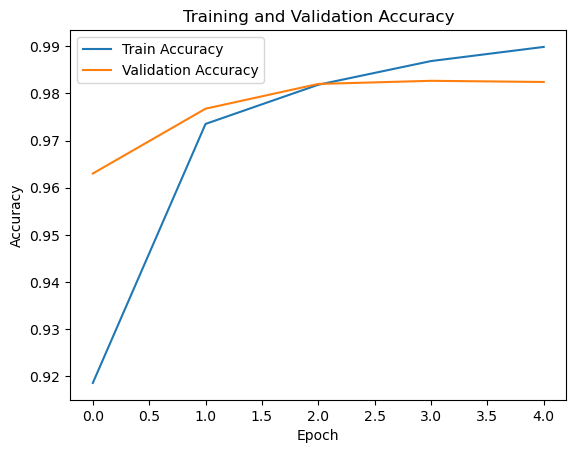

In [8]:
# 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 1. 데이터 로드 및 전처리
# mnist: 손글씨 숫자 데이터셋
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# CNN 입력 형태로 변환 (28x28x1) 및 정규화 (0~1)
# x_train과 x_test는 각각 이미지 데이터로, 크기는 (28, 28)
# CNN은 4D 형태 (배치 크기, 높이, 너비, 채널)로 데이터를 받기 때문에 .reshape(-1, 28, 28, 1)로 변형

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# 레이블은 정수형 그대로 사용 (sparse_categorical_crossentropy와 호환)
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")

# 2. 모델 구성
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # 첫 번째 컨볼루션 레이어
    MaxPooling2D(pool_size=(2, 2)),  # 맥스 풀링 레이어
    Flatten(),  # 평탄화
    Dense(100, activation='relu'),  # 은닉층
    Dense(10, activation='softmax')  # 출력층
])

# 모델 구조 확인
model.summary()

# 3. 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# 5. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 6. 학습 결과 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
